In [1]:
%pip install numpy
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 14.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 4.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 12.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 13.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 13.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 KB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 13.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 KB 14.4 MB/s eta 

In [2]:
import time
import subprocess
import resource
import pandas as pd
import seaborn as sns
from IPython.display import display

In [4]:
dimensions = [i for i in range(2, 9)]
points = [10**i for i in range(1, 6)]


runtime_data = []

for dimension in dimensions:
    print("Running dimension", dimension, "...")
    for p in points:
        print(f"... with {p} points")
        starttime = time.process_time()
        start_utime_before = resource.getrusage(resource.RUSAGE_CHILDREN).ru_utime

        process = subprocess.run(
            [f"rbox {p} D{dimension} | qhull", str(dimension)],
            stdout=subprocess.DEVNULL,
            shell=True,
        )

        end_utime_after = resource.getrusage(resource.RUSAGE_CHILDREN).ru_utime
        user_cpu_time = end_utime_after - start_utime_before


        runtime_data.append({'Dimension': dimension, 'Points': p, 'Runtime': user_cpu_time})

runtime = pd.DataFrame(runtime_data)

Running dimension 2 ...
... with 10 points
... with 100 points
... with 1000 points
... with 10000 points
... with 100000 points
Running dimension 3 ...
... with 10 points
... with 100 points
... with 1000 points
... with 10000 points
... with 100000 points
Running dimension 4 ...
... with 10 points
... with 100 points
... with 1000 points
... with 10000 points
... with 100000 points
Running dimension 5 ...
... with 10 points
... with 100 points
... with 1000 points
... with 10000 points
... with 100000 points
Running dimension 6 ...
... with 10 points
... with 100 points
... with 1000 points
... with 10000 points
... with 100000 points
Running dimension 7 ...
... with 10 points
... with 100 points
... with 1000 points
... with 10000 points
... with 100000 points
Running dimension 8 ...
... with 10 points
... with 100 points
... with 1000 points
... with 10000 points
... with 100000 points


Killed


In [5]:
display(runtime)

,Dimension,Points,Runtime
0,2,10,0.001657
1,2,100,0.001413
2,2,1000,0.002020
3,2,10000,0.009017
4,2,100000,0.064905
5,3,10,0.001452
6,3,100,0.001095
7,3,1000,0.002617
8,3,10000,0.013392
9,3,100000,0.119382


/tmp/ipykernel_10235/3970016791.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.get_figure().show()


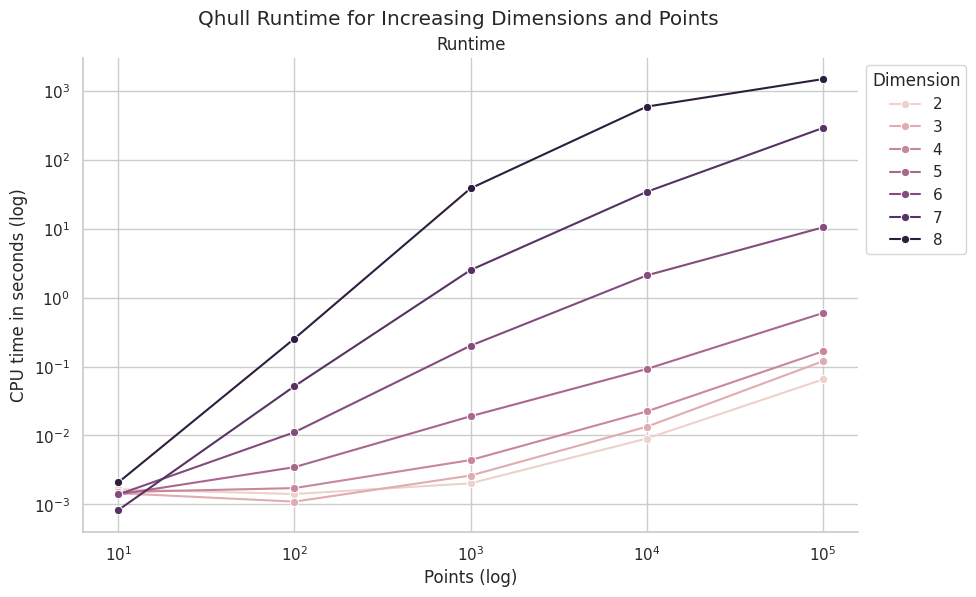

In [71]:
sns.set_theme(style="whitegrid", rc={"figure.figsize": (10, 6)})
plot = sns.lineplot(x='Points', y='Runtime', hue='Dimension', data=runtime, marker='o')
plot.set_title('Runtime')
plot.set_xlabel('Points (log)')
plot.set_ylabel('CPU time in seconds (log)')
plot.set_xscale('log')
plot.set_yscale('log')

plot.legend(title='Dimension', loc='upper left', bbox_to_anchor=(1, 1))

plot.figure.subplots_adjust(top=0.9)
plot.figure.suptitle("Qhull Runtime for Increasing Dimensions and Points")

sns.despine()
plot.get_figure().show()


Text(0.5, 0.98, 'Qhull Runtime for Increasing Dimensions per Points')

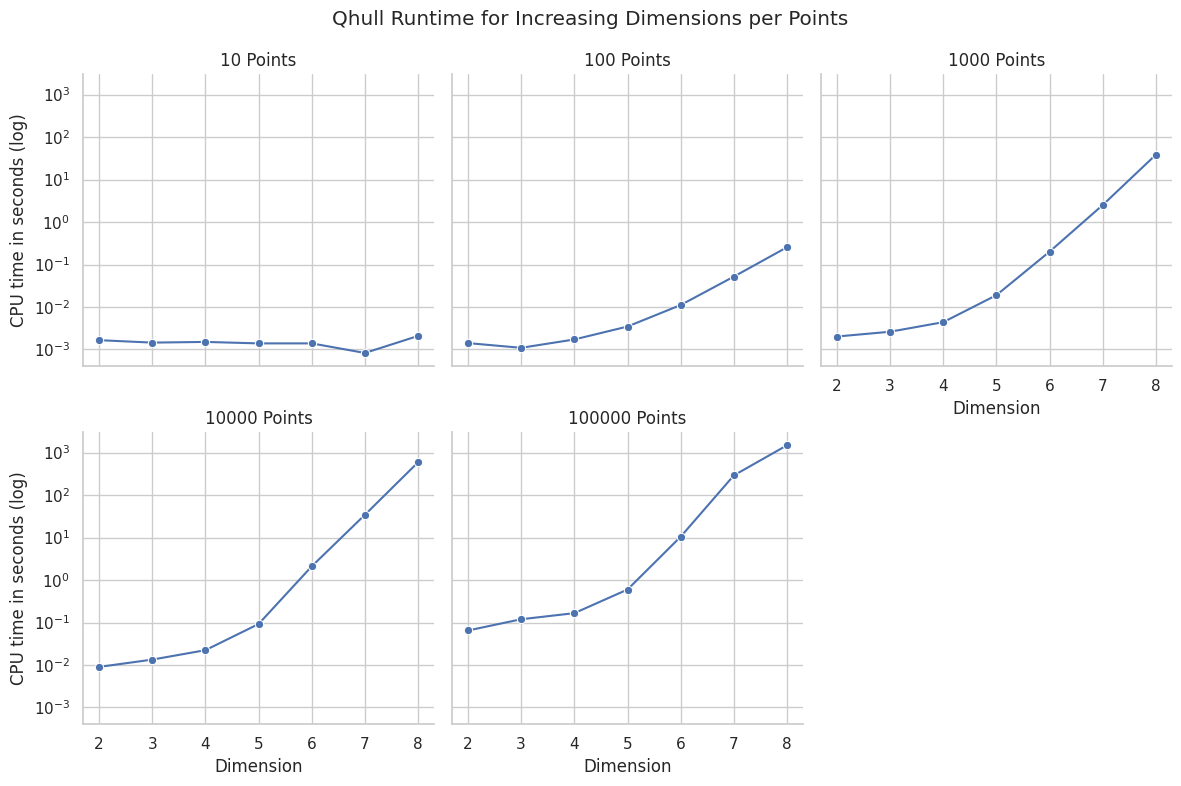

In [68]:
plot_points = sns.FacetGrid(runtime, col="Points", col_wrap=3, sharey=True, height=4)

plot_points.map(sns.lineplot, 'Dimension', 'Runtime', marker='o')
plot_points.set_titles(col_template="{col_name} Points")
plot_points.set_axis_labels("Dimension", "CPU time in seconds (log)")
for ax in plot_points.axes.flat:
    ax.set_yscale('log')
    sns.despine(ax=ax)


plot_points.figure.subplots_adjust(top=0.9)
plot_points.figure.suptitle('Qhull Runtime for Increasing Dimensions per Points')


Text(0.5, 0.98, 'Qhull Runtime for Increasing Points per Dimension')

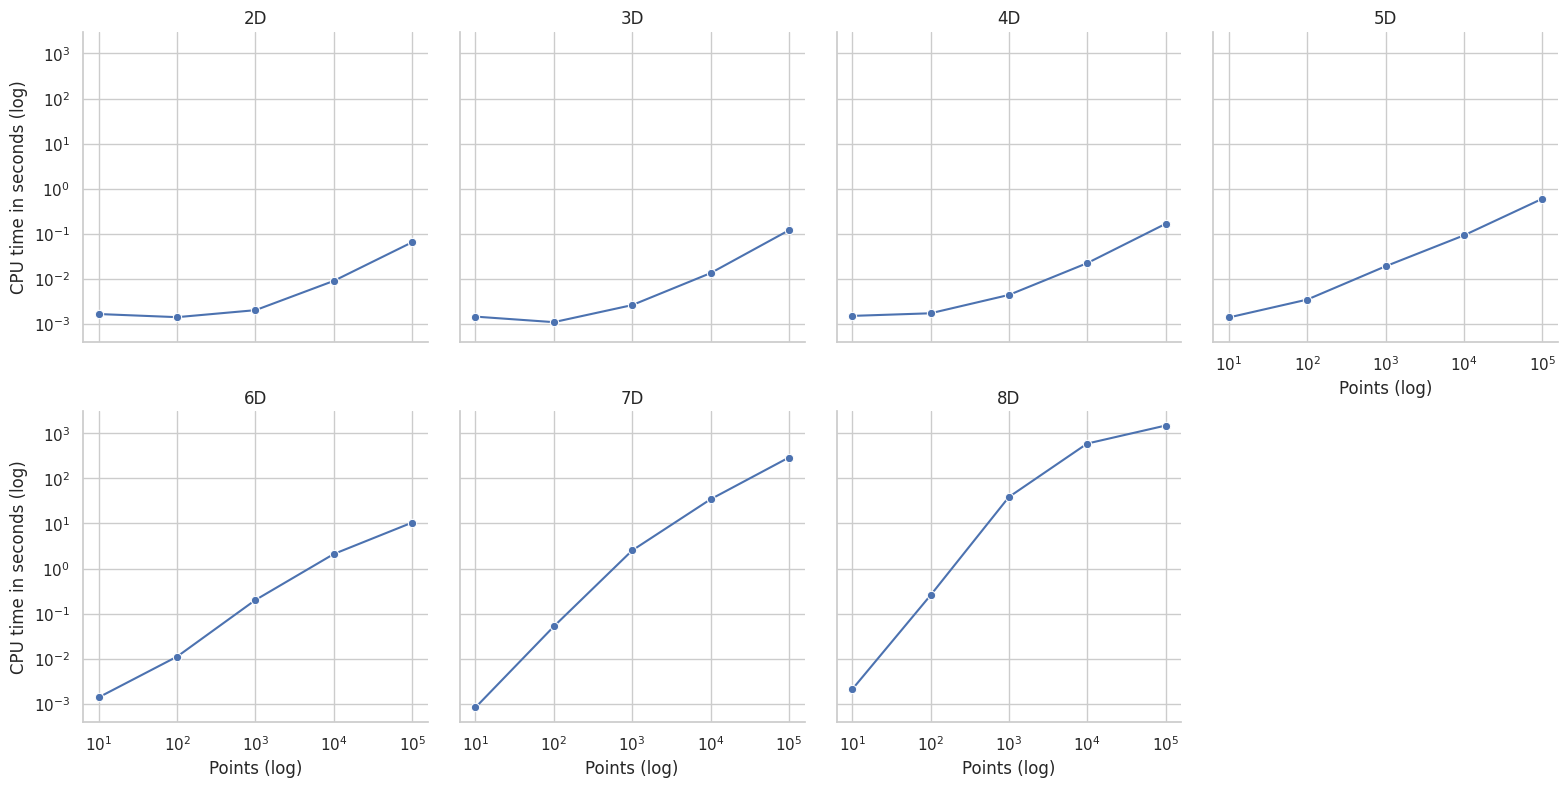

In [69]:
plot_dimensions = sns.FacetGrid(runtime, col="Dimension", col_wrap=4, sharey=True, height=4)

plot_dimensions.map(sns.lineplot, 'Points', 'Runtime', marker='o')
plot_dimensions.set_titles(col_template="{col_name}D")
plot_dimensions.set_axis_labels("Points (log)", "CPU time in seconds (log)")
for ax in plot_dimensions.axes.flat:
    ax.set_xscale('log')
    ax.set_yscale('log')
    sns.despine(ax=ax)

plot_points.figure.subplots_adjust(top=0.9)
plot_points.figure.suptitle('Qhull Runtime for Increasing Points per Dimension')